In [15]:
#画像を表現するクラスをロード
from PIL import Image
import numpy as np
#画像をsampleを開く
img = Image.open('image_shiba.jpg')

# グレースケールに変換
gray_img = img.convert('L')
gray_img.save('sample-gray.jpg')

height, width = gray_img.size
# 画像を配列に変換
img_pixels = np.array([[gray_img.getpixel((j,i)) for j in range(height)] for i in range(width)])

In [16]:
def new_image(img, filt):
    
    height, width = img_pixels.shape
    
    new_height = height - filt.shape[0] + 1
    new_width = width - filt.shape[1] + 1
    
    new_image = np.ones(new_height * new_width).reshape((new_height, new_width))
    
    for i in range(new_height):
        for j in range(new_width):
            point = img[i : i + filt.shape[0], j : j + filt.shape[1]] * filt
            new_image[i, j] = np.sum(point, axis=None)
    return new_image

In [17]:
from math import *
def gaussian(x, y, sigma):
    return 1 / (2*pi*sigma**2) * exp(-1 * (x**2 + y**2) / (2*sigma**2))
sigma = 5.0
N = 11
average_filter = np.ones(N**2).reshape((N, N)) / N**2
gaussian_filter = np.array([gaussian(x-1, y-1, sigma) for x in range(3) for y in range(3)]).reshape((3, 3))

new_image_1 = new_image(img_pixels, gaussian_filter)

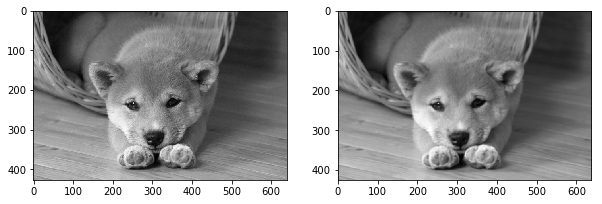

In [19]:
import matplotlib.pyplot as plt
fig, axes= plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(img_pixels, 'gray')
axes[1].imshow(new_image_1, 'gray')
plt.show()